In [48]:
#Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

#Thêm một số thư viện và lớp
import random
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score #Sự chính xác
from sklearn.metrics import precision_score #Độ chính xác
from sklearn.metrics import recall_score #Gọi lại
from sklearn.metrics import f1_score #F1
import matplotlib.pyplot as plt

#Tiêu đề
title = ['top-left1','top-left2','top-left3','top-left4','top-mid1','top-mid2','top-mid3','top-mid4','top-right1',
'top-right2','top-right3','top-right4','middle-left1','middle-left2','middle-left3','middle-left4','middle-mid1',' middle-mid2',
'middle-mid3','middle-mid4','middle-right1','middle-right2','middle-right3','middle-right4','bottom-left1','bottom-left2',
'bottom-left3','bottom-left4','bottom-mid1','bottom-mid2','bottom-mid3','bottom-mid4','bottom-right1','bottom-right2',
'bottom-right3','bottom-right4']

#Đọc dữ liệu Train - Test
data_train = pd.read_csv("data_statlog/sat.trn",encoding='utf-8',header=None,sep=' ')
data_test = pd.read_csv("data_statlog/sat.tst",encoding='utf-8',header=None,sep=' ')

#In dữ liệu
for i in range(0,len(title)):
    data_train.rename(columns={i:title[i]},inplace=True)
data_train.rename(columns={36:'Class'},inplace=True) #Thay đổi tiêu để cột thứ 36 và tham số inplace để chỉ định có hay không để thay đổi datafram hiện tại

data_train



,top-left1,top-left2,top-left3,top-left4,top-mid1,top-mid2,top-mid3,top-mid4,top-right1,top-right2,...,bottom-left4,bottom-mid1,bottom-mid2,bottom-mid3,bottom-mid4,bottom-right1,bottom-right2,bottom-right3,bottom-right4,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


In [8]:
'''     ---  1.KNN  ---   '''
from sklearn.neighbors import KNeighborsClassifier

#0. Các biến tham gia
lap = 5        #Cho biết là sẽ lặp 5 lần
tongKQF1_KNN = float(0)

#Vòng lặp
print('\tDự đoán nhãn bằng phương pháp K nearest neighbor')
for i in range(lap):

    #Dữ liệu bên tập dữ liệu huấn luyện
    x_train = data_train.values[:,:-1]     #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_train = data_train.values[:,-1]      #Lấy tất cả các hàng của cột cuối

    #Dữ liệu bên tập dữ liệu kiểm tra
    x_test = data_test.values[:,:-1]       #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_test = data_test.values[:,-1]        #Lấy tất cả các hàng của cột cuối

    langGieng = random.randint(100,150)
    print("=========================")
    print("Lặp lần thứ: {0} - K: {1}".format(i+1,langGieng))
    #1.Khởi tạo mô hình knn với sự random 70 - 140  phần tử liền kề
    model_KNN = KNeighborsClassifier(n_neighbors=langGieng)

    #2. Huấn luyện mô hình
    model_KNN.fit(x_train,y_train)

    #3. Dự đoán nhãn cho mô hình
    y_pred = model_KNN.predict(x_test)

    #4. Đánh giá 
    f1 = f1_score(y_test,y_pred,average="macro")   #Gồm Tập nhãn thực tế, tập nhãn dữ đoán và Tính F1 score theo từng nhãn và sau đó lấy trung bình cộng của các F1 score này. Phương pháp này là phương pháp mặc định.
    print(f'Độ chính xác: {accuracy_score(y_test,y_pred)*100:.2f}%')
    print(f'F1-score: {f1*100:.2f}%')

    #5.Lưu vào mảng
    tongKQF1_KNN += f1

#Trung bình cộng của F1 khi 5 lần lặp
print(f"Trung Bình cộng của F1 khi thực hiện 5 lần lặp bằng phương pháp KNN: {(tongKQF1_KNN/lap)*100:.2f}%")


	Dự đoán nhãn bằng phương pháp K nearest neighbor
Lặp lần thứ: 1 - K: 132
Độ chính xác: 84.00%
F1-score: 81.26%
Lặp lần thứ: 2 - K: 134
Độ chính xác: 84.00%
F1-score: 81.26%
Lặp lần thứ: 3 - K: 138
Độ chính xác: 83.95%
F1-score: 81.15%
Lặp lần thứ: 4 - K: 111
Độ chính xác: 84.60%
F1-score: 81.99%
Lặp lần thứ: 5 - K: 145
Độ chính xác: 83.75%
F1-score: 80.92%
Lặp lần thứ: 6 - K: 119
Độ chính xác: 84.35%
F1-score: 81.77%
Lặp lần thứ: 7 - K: 101
Độ chính xác: 84.75%
F1-score: 82.20%
Lặp lần thứ: 8 - K: 144
Độ chính xác: 83.80%
F1-score: 80.99%
Lặp lần thứ: 9 - K: 113
Độ chính xác: 84.50%
F1-score: 81.89%
Lặp lần thứ: 10 - K: 133
Độ chính xác: 84.00%
F1-score: 81.23%
Trung Bình cộng của F1 khi thực hiện 5 lần lặp bằng phương pháp KNN: 81.47%


----------Bayes----------
Độ chính xác của Multinomial Naive Bayes (Lần 1): 0.7685
F1-score: 0.70%
Báo cáo phân loại cho Multinomial Naive Bayes (Lần 1):
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.88      0.93       224
           3       0.66      0.83      0.73       397
           4       0.31      0.04      0.08       211
           5       0.76      0.70      0.73       237
           7       0.65      0.80      0.72       470

    accuracy                           0.77      2000
   macro avg       0.72      0.71      0.70      2000
weighted avg       0.74      0.77      0.74      2000

Độ chính xác của Multinomial Naive Bayes (Lần 2): 0.7685
F1-score: 0.70%
Báo cáo phân loại cho Multinomial Naive Bayes (Lần 2):
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.88      0.93       224
           3

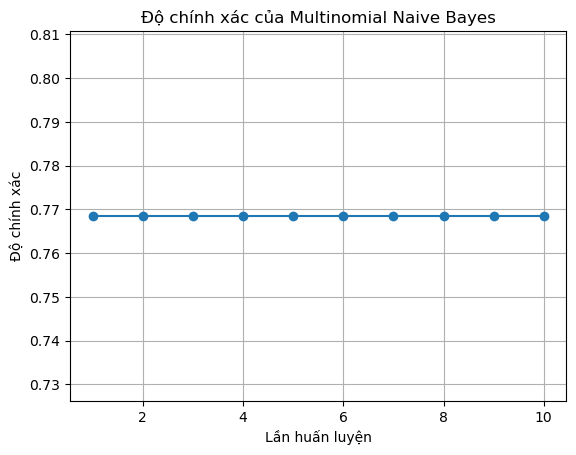

In [4]:

accuracies = []
TongKQF1_bayes = float(0)

from sklearn.naive_bayes import MultinomialNB
print('----------Bayes----------')
for i in range(lap):

    #Dữ liệu bên tập dữ liệu huấn luyện
    x_train = data_train.values[:,:-1]     #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_train = data_train.values[:,-1]      #Lấy tất cả các hàng của cột cuối

    #Dữ liệu bên tập dữ liệu kiểm tra
    x_test = data_test.values[:,:-1]       #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_test = data_test.values[:,-1]        #Lấy tất cả các hàng của cột cuối
    
    # Multinomial Naive Bayes
    mnb = MultinomialNB()
    mnb.fit(x_train, y_train)

    # Dự đoán
    y_pred_mnb = mnb.predict(x_test)

    # Đánh giá mô hình
    from sklearn.metrics import accuracy_score, classification_report

    accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
    f1 = f1_score(y_test,y_pred_mnb,average="macro")
    accuracies.append(accuracy_mnb)  # Thêm độ chính xác vào danh sách accuracies
    print(f"Độ chính xác của Multinomial Naive Bayes (Lần {i + 1}): {accuracy_mnb}")
    print(f'F1-score: {f1:.2f}%')

    TongKQF1_bayes = f1
    # Tạo báo cáo phân loại
    report_mnb = classification_report(y_test, y_pred_mnb)
    print(f"Báo cáo phân loại cho Multinomial Naive Bayes (Lần {i + 1}):")
    print(report_mnb)

#Trung bình cộng của f1 sau các lần lăp
print(f"Trung bình cộng của F1 sau {lap} lần lặp bằng giải thuật bayes: {(TongKQF1_bayes/lap)*100:.2f}%")

# Vẽ biểu đồ hoặc thực hiện các thao tác khác dựa trên giá trị trong accuracies
plt.plot(range(1, lap + 1), accuracies, marker='o', linestyle='-')
plt.title('Độ chính xác của Multinomial Naive Bayes')
plt.xlabel('Lần huấn luyện')
plt.ylabel('Độ chính xác')
plt.grid(True)
plt.show()

In [5]:
''' 3. Cây quyết định bằng gini'''

from sklearn.tree import DecisionTreeClassifier

#Các biến tham gia
TongKQ_DTC = float(0)
SoLuongNgauNhien = random.randint(100,150)

#Vòng lặp
print('\tDự đoán nhãn bằng phương pháp cây quyết định')
for i in range(lap):

    #Dữ liệu bên tập dữ liệu huấn luyện
    x_train = data_train.values[:,:-1]     #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_train = data_train.values[:,-1]      #Lấy tất cả các hàng của cột cuối

    #Dữ liệu bên tập dữ liệu kiểm tra
    x_test = data_test.values[:,:-1]       #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_test = data_test.values[:,-1]        #Lấy tất cả các hàng của cột cuối

    print('==========================')
    print(f'Lần lặp thứ {i}')
    #1.Khởi tạo mô hình
    indexGiNi = DecisionTreeClassifier(criterion="gini",max_depth=5)

    #2.Huấn luyện mô hình
    indexGiNi.fit(x_train,y_train)

    #3.Dự đoán nhãn cho tập dữ liệu kiểm tra
    y_predict = indexGiNi.predict(x_test)

    #4. Đánh giá
    F1 = f1_score(y_test,y_predict, average="macro")    #Gồm Tập nhãn thực tế, tập nhãn dữ đoán và Tính F1 score theo từng nhãn và sau đó lấy trung bình cộng của các F1 score này. Phương pháp này là phương pháp mặc định.
    Recall = recall_score(y_test,y_predict,average="macro")
    Accuracy = accuracy_score(y_test,y_predict)
    Precision = precision_score(y_test,y_predict,average="macro")
    print(f'F1_score: {F1*100:.3f}%')
    print(f'Độ chính xác: {Precision*100:.3f}%')
    print(f'Sự chính xác: {Accuracy*100:.3f}%')
    print(f'Recall: {Recall*100:.3f}%')

    #Tổng kết quả F1 sau mỗi lần lặp
    TongKQ_DTC+=F1

#Tính trung bình cộng của F1 sau 5 lần lặp
print(f"Trung Bình cộng của F1 khi thực hiện 5 lần lặp bằng phương pháp Cây quyết định: {(TongKQ_DTC/lap)*100:.3f}%")

	Dự đoán nhãn bằng phương pháp cây quyết định
Lần lặp thứ 0
F1_score: 76.513%
Độ chính xác: 77.583%
Sự chính xác: 80.750%
Recall: 76.053%
Lần lặp thứ 1
F1_score: 76.429%
Độ chính xác: 77.491%
Sự chính xác: 80.700%
Recall: 75.983%
Lần lặp thứ 2
F1_score: 76.429%
Độ chính xác: 77.491%
Sự chính xác: 80.700%
Recall: 75.983%
Lần lặp thứ 3
F1_score: 76.521%
Độ chính xác: 77.610%
Sự chính xác: 80.750%
Recall: 76.047%
Lần lặp thứ 4
F1_score: 76.521%
Độ chính xác: 77.610%
Sự chính xác: 80.750%
Recall: 76.047%
Lần lặp thứ 5
F1_score: 76.521%
Độ chính xác: 77.610%
Sự chính xác: 80.750%
Recall: 76.047%
Lần lặp thứ 6
F1_score: 76.521%
Độ chính xác: 77.610%
Sự chính xác: 80.750%
Recall: 76.047%
Lần lặp thứ 7
F1_score: 76.513%
Độ chính xác: 77.583%
Sự chính xác: 80.750%
Recall: 76.053%
Lần lặp thứ 8
F1_score: 76.513%
Độ chính xác: 77.583%
Sự chính xác: 80.750%
Recall: 76.053%
Lần lặp thứ 9
F1_score: 76.474%
Độ chính xác: 77.539%
Sự chính xác: 80.700%
Recall: 76.018%
Trung Bình cộng của F1 khi thực hi

In [52]:
'''4. Cây quyết định. '''
from sklearn.ensemble import RandomForestClassifier

'''
    - Giải thích về Lớp RandomForestClassifier() của thư viện Scikit-Learn là một mô hình phân loại 
    dựa trên rừng cây quyết định ngẫu nhiên. Mô hình này hoạt động bằng cách xây dựng một tập hợp các 
    cây quyết định ngẫu nhiên, sau đó sử dụng tập hợp này để dự đoán lớp của các mẫu mới.
    -Lớp RandomForestClassifier() có các thuộc tính sau:

        + n_estimators: Số lượng cây quyết định trong rừng.
        + max_depth: Độ sâu tối đa của mỗi cây quyết định.
        + min_samples_split: Số lượng mẫu tối thiểu cần thiết để chia một nút.
        + min_samples_leaf: Số lượng mẫu tối thiểu cần thiết để tạo một nút lá.
        + max_features: Số lượng thuộc tính tối đa được sử dụng để chia một nút.
        + bootstrap: Phương pháp lấy mẫu dữ liệu để xây dựng các cây quyết định.
        + criterion: Tiêu chí được sử dụng để phân chia các nút trong cây quyết định.
        + class_weight: Cân bằng trọng số của các lớp trong tập dữ liệu.
'''
TongKQF1_RF = float(0)
for i in range(lap):

    #Dữ liệu bên tập dữ liệu huấn luyện
    x_train = data_train.values[:,:-1]     #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_train = data_train.values[:,-1]      #Lấy tất cả các hàng của cột cuối

    #Dữ liệu bên tập dữ liệu kiểm tra
    x_test = data_test.values[:,:-1]       #Lấy tất cả các hàng và Các cột không phải cột lớp
    y_test = data_test.values[:,-1]        #Lấy tất cả các hàng của cột cuối
    #---------------------------------------------
    print(f"Lần lặp thứ {i}:")
    clf = RandomForestClassifier(n_estimators=random.randint(100,150),max_depth=5)

    #1.Huấn luyện
    clf.fit(x_train,y_train)

    #2.Dự báo
    y_pred = clf.predict(x_test)

    #3. Đánh giá
    F1 = f1_score(y_test,y_pred, average='macro')
    Accuracy = accuracy_score(y_test,y_pred)
    Recall = recall_score(y_test,y_pred, average='macro')
    Precision = precision_score(y_test,y_pred, average='macro')
    TongKQF1_RF +=F1

    #4. In kết quả
    print(f'F1: {F1*100:.3f}%')
    print(f'Độ chính xác: {Accuracy*100:.3f}%')
    print(f'Recall: {Recall*100:.3f}%')
    print(f'Sự chính xác: {Precision*100:.3f}%')
    print('======================')

print(f"Trung Bình cộng của F1 khi thực hiện 5 lần lặp bằng phương pháp Rừng ngẫu nhiên: {(TongKQF1_RF/lap)*100:.3f}%")


Lần lặp thứ 0:
F1: 82.410%
Độ chính xác: 85.500%
Recall: 81.113%
Sự chính xác: 85.814%
Lần lặp thứ 1:
F1: 82.786%
Độ chính xác: 85.650%
Recall: 81.544%
Sự chính xác: 85.890%
Lần lặp thứ 2:
F1: 83.222%
Độ chính xác: 86.000%
Recall: 81.949%
Sự chính xác: 86.398%
Lần lặp thứ 3:
F1: 82.526%
Độ chính xác: 85.700%
Recall: 81.215%
Sự chính xác: 86.306%
Lần lặp thứ 4:
F1: 82.857%
Độ chính xác: 85.850%
Recall: 81.618%
Sự chính xác: 86.083%
Lần lặp thứ 5:
F1: 82.887%
Độ chính xác: 85.750%
Recall: 81.600%
Sự chính xác: 86.140%
Lần lặp thứ 6:
F1: 82.705%
Độ chính xác: 85.700%
Recall: 81.421%
Sự chính xác: 85.998%
Lần lặp thứ 7:
F1: 83.353%
Độ chính xác: 86.100%
Recall: 82.063%
Sự chính xác: 86.524%
Lần lặp thứ 8:
F1: 82.248%
Độ chính xác: 85.450%
Recall: 80.987%
Sự chính xác: 85.688%
Lần lặp thứ 9:
F1: 83.002%
Độ chính xác: 85.950%
Recall: 81.647%
Sự chính xác: 86.522%
Trung Bình cộng của F1 khi thực hiện 5 lần lặp bằng phương pháp Rừng ngẫu nhiên: 82.800%


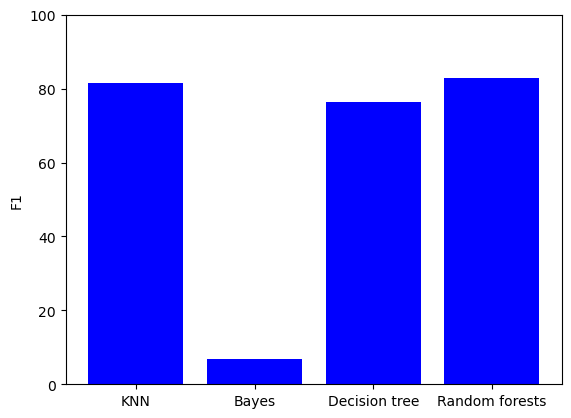

In [53]:
#Vẽ biểu đồ so sánh độ chính xác F1 của 3 giải thuật trên
BieuDoSoSanh = plt
GiaiThuat = ['KNN','Bayes','Decision tree','Random forests']
KQ = [(tongKQF1_KNN/lap)*100,(TongKQF1_bayes/lap)*100,(TongKQ_DTC/lap)*100,(TongKQF1_RF/lap)*100]
BieuDoSoSanh.ylabel('F1')
BieuDoSoSanh.bar(GiaiThuat,KQ,color='blue')
BieuDoSoSanh.ylim(0,100)
BieuDoSoSanh.show()